<a href="https://colab.research.google.com/github/milindz/Food-Items-Classification/blob/main/Food_Classification(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-8fa926ff-91f1-3625-abdd-382d1efa743e)


## We will be covering 2 important concepts in this first notebook-
1.  Binary classification with CNNs:          
      * We will train a model to classify an image of food 
        into 2 classes (pizza and steak) only.

2.  Multi-Class image classification with CNNs:     
     * We will train a model to classify an image of food 
      into 10 different classes.


### Dataset
 The images we're going to work with are from the [Food-101](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/) dataset, a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes

>🔑 Note: To prepare the data we're using, preprocessing steps such as, moving the images into different subset folders, have been done. To see these preprocessing steps check out the [preprocessing notebook](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb).

## **Binary Classification**

In [49]:
#To begin, we're only going to use two of the categories, pizza and steak and build a binary classifier

In [6]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

--2021-11-29 12:50:48--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.197.128, 64.233.191.128, 209.85.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   187MB/s    in 0.6s    

2021-11-29 12:50:48 (187 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



In [9]:
#Unzipping the file
unzipped_file = zipfile.ZipFile("/content/pizza_steak.zip","r")
unzipped_file.extractall()
unzipped_file.close()

In [10]:
# Inspecting the data folder
!ls pizza_steak

test  train


In [11]:
!ls pizza_steak/train/

pizza  steak


In [12]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [13]:
#Listing no. of files
import os
for dir_path, dir_names, filenames in os.walk("/content/pizza_steak"):
  print(f"There are {len(dir_names)} directories and {len(filenames)} images in '{dir_path}'.")


There are 2 directories and 1 images in '/content/pizza_steak'.
There are 2 directories and 1 images in '/content/pizza_steak/train'.
There are 0 directories and 750 images in '/content/pizza_steak/train/pizza'.
There are 0 directories and 750 images in '/content/pizza_steak/train/steak'.
There are 2 directories and 1 images in '/content/pizza_steak/test'.
There are 0 directories and 250 images in '/content/pizza_steak/test/pizza'.
There are 0 directories and 250 images in '/content/pizza_steak/test/steak'.


In [14]:
# Getting class names
import numpy as np
import pathlib
data_dir =  pathlib.Path("pizza_steak/train/")  # converts training path to python path
class_names =  np.array(sorted([item.name for item in data_dir.glob("*")]))  # creates a list of classes from sub-directories
print(class_names) 

['.DS_Store' 'pizza' 'steak']


In [16]:
# Visualizing an random image from target class
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [29]:
def view_random_image(target_path,target_class):
  target_dir = target_path + target_class
  random_image = random.sample(os.listdir(target_dir),1)
  #print(random_image)
  img =  mpimg.imread(target_dir + "/" +  random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(img.shape)
  return img


(512, 512, 3)


array([[[ 42,  14,  10],
        [ 46,  18,  14],
        [ 48,  20,  16],
        ...,
        [ 24,  40,  66],
        [ 22,  38,  64],
        [ 20,  36,  62]],

       [[ 48,  19,  15],
        [ 50,  21,  17],
        [ 51,  23,  19],
        ...,
        [ 21,  37,  63],
        [ 18,  34,  60],
        [ 16,  32,  58]],

       [[ 56,  27,  21],
        [ 56,  27,  21],
        [ 56,  27,  21],
        ...,
        [ 21,  37,  63],
        [ 19,  35,  61],
        [ 17,  33,  59]],

       ...,

       [[ 38,   7,   4],
        [ 38,   7,   4],
        [ 38,   7,   5],
        ...,
        [246, 201, 159],
        [247, 203, 164],
        [248, 205, 170]],

       [[ 40,  10,   8],
        [ 39,   9,   7],
        [ 37,   9,   8],
        ...,
        [241, 198, 155],
        [235, 196, 157],
        [241, 203, 167]],

       [[ 44,  16,  15],
        [ 42,  14,  13],
        [ 39,  11,  10],
        ...,
        [235, 193, 151],
        [226, 186, 150],
        [239, 201, 165]]

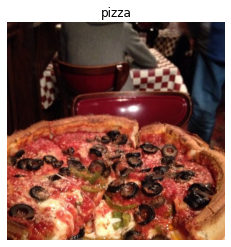

In [30]:
view_random_image("pizza_steak/train/","pizza")

(512, 512, 3)


array([[[191,  32,  11],
        [185,  29,   7],
        [174,  17,   0],
        ...,
        [207, 205, 144],
        [208, 204, 141],
        [206, 202, 139]],

       [[176,  20,   0],
        [179,  23,   1],
        [179,  22,   3],
        ...,
        [210, 205, 147],
        [213, 207, 147],
        [216, 210, 148]],

       [[173,  17,   0],
        [175,  19,   0],
        [181,  26,   6],
        ...,
        [210, 203, 148],
        [215, 206, 149],
        [221, 212, 153]],

       ...,

       [[ 33,  22,   0],
        [ 36,  26,   1],
        [ 43,  31,   5],
        ...,
        [203, 215, 203],
        [212, 222, 213],
        [212, 222, 213]],

       [[ 37,  27,   2],
        [ 42,  32,   7],
        [ 48,  36,  10],
        ...,
        [197, 205, 190],
        [214, 222, 209],
        [216, 224, 213]],

       [[ 32,  22,   0],
        [ 39,  27,   3],
        [ 47,  35,   9],
        ...,
        [192, 199, 181],
        [207, 213, 199],
        [205, 211, 199]]

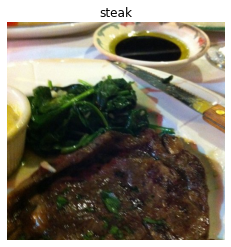

In [31]:
view_random_image("pizza_steak/train/","steak")

(384, 512, 3)


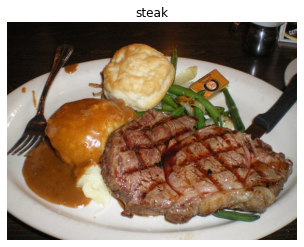

In [33]:
img = view_random_image("pizza_steak/train/","steak")

In [34]:
img

array([[[ 9,  8,  3],
        [10,  9,  4],
        [10,  9,  4],
        ...,
        [37, 50,  0],
        [47, 58,  2],
        [65, 76, 18]],

       [[11, 10,  5],
        [11, 10,  5],
        [11, 10,  5],
        ...,
        [40, 52,  4],
        [43, 53,  1],
        [54, 64, 11]],

       [[11, 10,  5],
        [12, 11,  6],
        [11, 10,  5],
        ...,
        [42, 50,  9],
        [37, 46,  3],
        [42, 51,  6]],

       ...,

       [[16, 15, 11],
        [16, 15, 11],
        [16, 15, 11],
        ...,
        [18, 15,  8],
        [16, 13,  6],
        [17, 14,  7]],

       [[14, 13,  9],
        [15, 14, 10],
        [16, 15, 11],
        ...,
        [19, 18, 13],
        [20, 19, 14],
        [21, 20, 15]],

       [[14, 13,  9],
        [15, 14, 10],
        [16, 15, 11],
        ...,
        [23, 22, 18],
        [25, 24, 20],
        [27, 26, 22]]], dtype=uint8)

In [35]:
# Creating a CNN model for binary classification

In [36]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [46]:
## Data Preprocessing
# Scaling the pixel values between 0 to 1
train_datagen =  ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Train and test directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Importing data from directories and turning themm into batches of 32

train_data  = train_datagen.flow_from_directory(train_dir,
                                                batch_size = 32,
                                                target_size = (224,224),
                                                class_mode = "binary")

valid_data  = valid_datagen.flow_from_directory( test_dir,
                                                batch_size = 32,
                                                target_size = (224,224),
                                                class_mode = "binary")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [39]:
from tensorflow.keras import layers

In [42]:
# CNN model
model1 = tf.keras.Sequential(
    [
     layers.Conv2D(filters=10, kernel_size=(3,3),activation="relu", input_shape = (224,224,3)),
     layers.Conv2D(10,3,activation="relu"),
     layers.MaxPool2D(pool_size=2, padding="same"),
     layers.Conv2D(10,3,activation="relu"),
     layers.Conv2D(10,3,activation="relu"),
     layers.MaxPool2D(pool_size=2),
     layers.Flatten(),
     layers.Dense(1,activation="sigmoid")

    ]
)


#compile model
model1.compile(loss = "binary_crossentropy",
               optimizer= tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

In [44]:
from tensorflow.keras.utils import plot_model

In [50]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

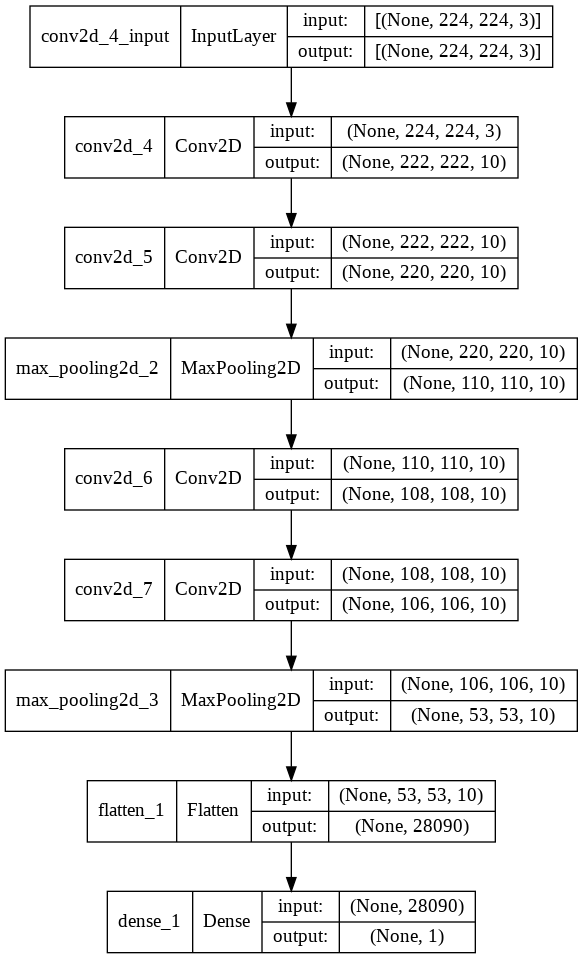

In [45]:
plot_model(model1, show_shapes= True)

In [47]:
# Fitting the model
model1_history = model1.fit(train_data,
                            epochs = 5,
                            steps_per_epoch = len(train_data),
                            validation_data = valid_data,
                            validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 22s 262ms/step - loss: 0.5905 - accuracy: 0.6800 - val_loss: 0.4492 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 11s 238ms/step - loss: 0.4710 - accuracy: 0.7927 - val_loss: 0.3884 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 11s 238ms/step - loss: 0.4216 - accuracy: 0.8187 - val_loss: 0.4369 - val_accuracy: 0.8000
Epoch 4/5
47/47 [==============================] - 11s 239ms/step - loss: 0.3759 - accuracy: 0.8460 - val_loss: 0.3642 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 11s 245ms/step - loss: 0.2774 - accuracy: 0.8927 - val_loss: 0.4693 - val_accuracy: 0.7900


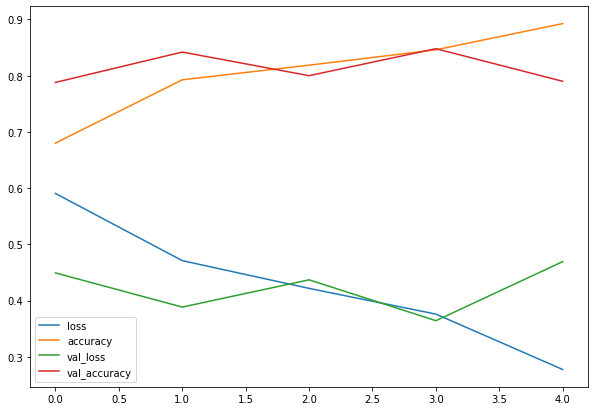

In [48]:
# Plot the training curves
import pandas as pd
pd.DataFrame(model1.history.history).plot(figsize=(10, 7));

> 🔑 Note: When a model's validation loss starts to increase, it's likely that it's overfitting the training dataset. 

#### Steps we can take to overcome the overfitting problem-
1. Add more data
2. Data Augmentation
3. Regularization (Drop Out layer)
4. Reduce model's complexity

In [51]:
# Plot the validation and training data separately
def plot_loss_curves(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

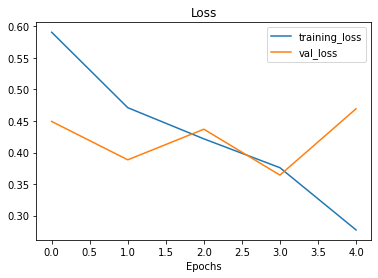

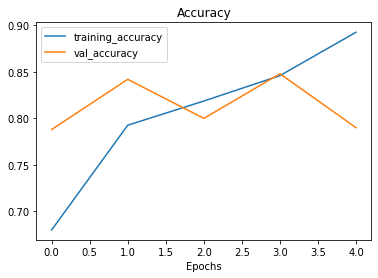

In [52]:
plot_loss_curves(model1_history)

In [53]:
# Making  a prediction with our model

(-0.5, 3023.5, 4031.5, -0.5)

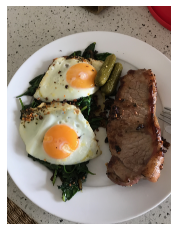

In [63]:
predict_image =  mpimg.imread("/content/03-steak.jpeg")
plt.imshow(predict_image)
plt.axis("off")

In [64]:
predict_image.shape

(4032, 3024, 3)

> 🔑 Note: For your model to make predictions on unseen data, for example, your own custom images, the custom image has to be in the same shape as your model has been trained on. 

In [67]:
# Function to import our predict_image and resize it  so that we can use our model on it to predict the target class
def  prepare_image(filename, shape= 224):
  img = tf.io.read_file(filename) # reads the file
  img = tf.image.decode_image(img,channels=3)  # converts image to a tensor
  img = tf.image.resize(img, size = [shape,shape]) # resizing the image to 224*224 px
  img = img/255 # rescale the image 
  return img


In [68]:
steak = prepare_image("/content/03-steak.jpeg")

In [69]:
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [71]:
steak.shape

TensorShape([224, 224, 3])

In [70]:
# Prediction
model1.predict(steak)

ValueError: ignored

In [72]:
# Adding dimension for batch_size
steak = tf.expand_dims(steak, axis=0) 

In [74]:
steak.shape

TensorShape([1, 224, 224, 3])

In [79]:
prediction = model1.predict(steak)

In [80]:
prediction

array([[0.98631513]], dtype=float32)

In [81]:
class_names 

array(['.DS_Store', 'pizza', 'steak'], dtype='<U9')

In [91]:
mod_class_names = np.delete(class_names,0)

In [92]:
mod_class_names

array(['pizza', 'steak'], dtype='<U9')

In [93]:
# Function to convert prediction probability to class names and plot the image

def predict_plot(model,img_file, class_names = mod_class_names):
  img = prepare_image(img_file)
  prediction = model.predict(tf.expand_dims(img,axis = 0))
  predicted_class = class_names[int(tf.round(prediction)[0][0])]   # get index of the predicted class by rounding the prediction probability
  plt.imshow(img)
  plt.title(f"{predicted_class}")
  plt.axis("off")


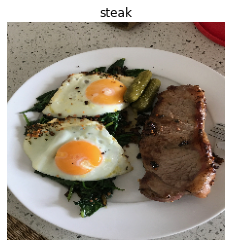

In [94]:
predict_plot(model1, "/content/03-steak.jpeg")

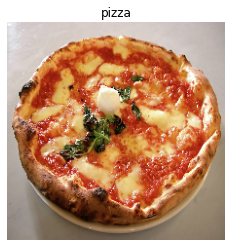

In [95]:
predict_plot(model1,"/content/Eq_it-na_pizza-margherita_sep2005_sml.png")

## **Multi-Class Classification**

>🔑Note: Here we will be going through the same steps as above  but instead of classifying our food image into  2 categories(pizza and steak), we will now be working with 10 different classes of food.

In [97]:
# Getting the data
import zipfile


!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-11-29 15:16:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.69.128, 64.233.182.128, 173.194.196.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   111MB/s    in 4.0s    

2021-11-29 15:16:44 (123 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [98]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.

In [100]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [101]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


(512, 512, 3)


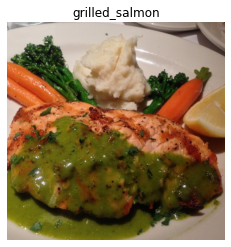

In [108]:
# View a random image from the training dataset
import random
img = view_random_image(train_dir, random.choice(class_names))

(384, 512, 3)


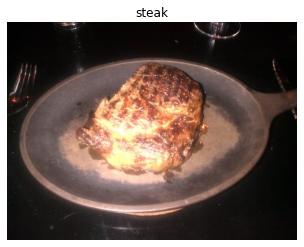

In [110]:
img =  view_random_image(test_dir, random.choice(class_names))

In [111]:
# Data Preprocessing using the ImageDataGenerator class
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') 

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [113]:
# Creating a CNN model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model2 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') 
])

# Compile the model
model2.compile(loss="categorical_crossentropy", 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [114]:
# Fit the model
model2_history = model2.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 60s 251ms/step - loss: 2.1969 - accuracy: 0.1832 - val_loss: 2.0497 - val_accuracy: 0.2740
Epoch 2/5
235/235 [==============================] - 57s 241ms/step - loss: 1.9404 - accuracy: 0.3211 - val_loss: 1.9193 - val_accuracy: 0.3196
Epoch 3/5
235/235 [==============================] - 57s 242ms/step - loss: 1.6066 - accuracy: 0.4581 - val_loss: 1.9997 - val_accuracy: 0.3172
Epoch 4/5
235/235 [==============================] - 56s 240ms/step - loss: 1.0775 - accuracy: 0.6463 - val_loss: 2.2752 - val_accuracy: 0.3024
Epoch 5/5
235/235 [==============================] - 56s 239ms/step - loss: 0.5549 - accuracy: 0.8217 - val_loss: 2.9384 - val_accuracy: 0.2884


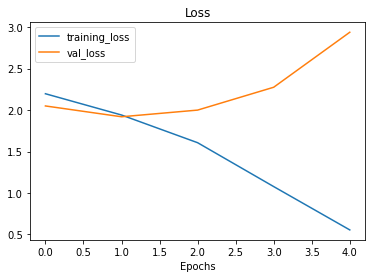

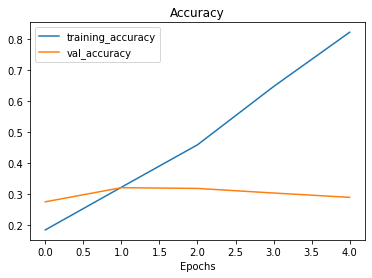

In [115]:
plot_loss_curves(model2_history)

In [116]:
# To overcome the overfitting situation we implement data augmentation and reduce model complexity
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [117]:
# Less complex model (removed two layers)
model3 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model3.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])



In [118]:
model3_history = model3.fit(train_data_augmented, 
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 128s 544ms/step - loss: 2.2256 - accuracy: 0.1659 - val_loss: 2.0452 - val_accuracy: 0.2736
Epoch 2/5
235/235 [==============================] - 127s 543ms/step - loss: 2.1093 - accuracy: 0.2520 - val_loss: 2.0186 - val_accuracy: 0.2752
Epoch 3/5
235/235 [==============================] - 127s 541ms/step - loss: 2.0320 - accuracy: 0.2904 - val_loss: 1.9222 - val_accuracy: 0.3212
Epoch 4/5
235/235 [==============================] - 127s 542ms/step - loss: 1.9946 - accuracy: 0.3116 - val_loss: 1.8628 - val_accuracy: 0.3516
Epoch 5/5
235/235 [==============================] - 126s 536ms/step - loss: 1.9600 - accuracy: 0.3305 - val_loss: 1.8310 - val_accuracy: 0.3620


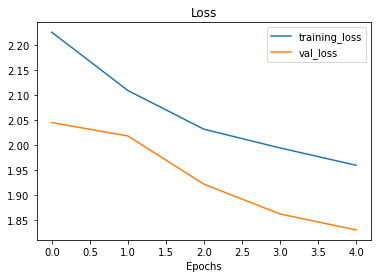

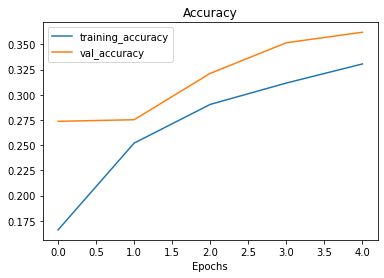

In [119]:
plot_loss_curves(model3_history)

The loss curves are much closer to eachother. Although our model didn't perform as well on the augmented training set, it performed much better on the validation dataset.

In [120]:
# Making predictions with our model

In [121]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

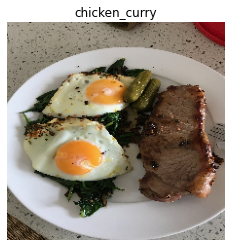

In [123]:
predict_plot(model3,"/content/03-steak.jpeg", class_names= class_names)

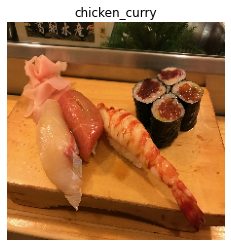

In [124]:
predict_plot(model3,"/content/03-sushi.jpeg", class_names= class_names)

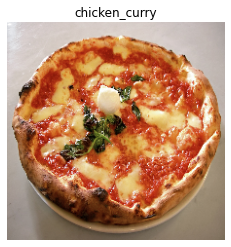

In [125]:
predict_plot(model3,"/content/Eq_it-na_pizza-margherita_sep2005_sml.png", class_names= class_names)

Text(0.5, 1.0, 'sushi')

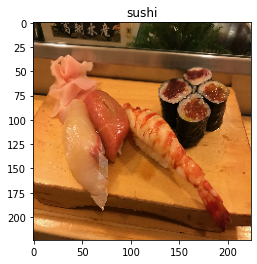

In [128]:
# Function is only returning only class "chicken curry" for all images, let's try predicting without the function
img = prepare_image("/content/03-sushi.jpeg")
prediction =  model3.predict(tf.expand_dims(img,axis = 0))
prediction_class =  class_names[prediction.argmax()]
plt.imshow(img)
plt.title(prediction_class)


In [129]:
prediction

array([[0.05448382, 0.06895116, 0.0521643 , 0.13826987, 0.06416406,
        0.03528367, 0.18813832, 0.11331328, 0.06233928, 0.22289214]],
      dtype=float32)

In [135]:
# Modifying our pred_plot function for multi-class classification
def pred_and_plot(model, filename, class_names):


  img = prepare_image(filename)


  pred = model.predict(tf.expand_dims(img, axis=0))
  if len(pred[0]) > 1:  # multi-class
    pred_class = class_names[pred.argmax()] 
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])]


  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

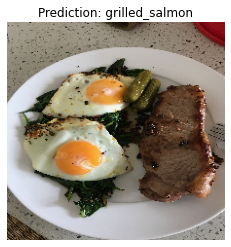

In [136]:
pred_and_plot(model3,"/content/03-steak.jpeg", class_names= class_names)

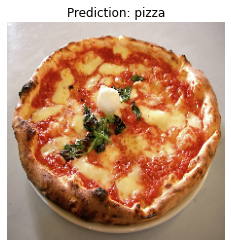

In [138]:
pred_and_plot(model3,"/content/Eq_it-na_pizza-margherita_sep2005_sml.png", class_names= class_names)

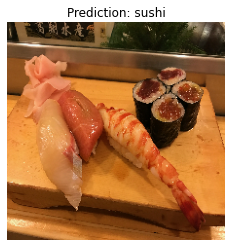

In [139]:
pred_and_plot(model3,"/content/03-sushi.jpeg", class_names= class_names)

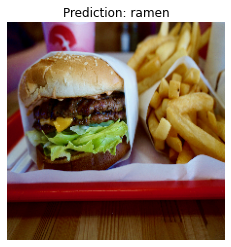

In [140]:
pred_and_plot(model3,"/content/03-hamburger.jpeg", class_names= class_names)

Our model's predictions aren't very good, this is because it's only performing at ~36% accuracy on the test dataset.